# **Analisis Virtual Potensi Senyawa Tumbuhan Herbal Indonesia sebagai Inhibitor Histone Deacetylase (HDAC) untuk Terapi Kanker Payudara**

---

### **Apa itu HDAC?**
- **Histone Deacetylase (HDAC)** adalah enzim yang berperan dalam regulasi epigenetik.
- HDAC mengontrol ekspresi gen melalui penghapusan gugus asetil dari histon.
- Pada kanker, aktivitas berlebih HDAC menekan gen tumor-supresor, mendukung proliferasi sel kanker.

---



## **Instalasi**

In [4]:
!pip install chembl_webresource_client rdkit-pypi joblib

In [5]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-12-26 04:37:39--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh [following]
--2024-12-26 04:37:40--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231 [text/plain]
Saving to: ‘padel.sh.1’

padel.sh.1          100%[===================>]     231  --.-KB/s    in 0s      

2024-12-26 04:37:40 (10.3 MB/s) - ‘padel.sh.1’ saved [231/231]



In [6]:
# Unduh file PaDEL-Descriptor (jika belum tersedia)
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
!unzip padel.zip

--2024-12-26 04:37:40--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-12-26 04:37:41--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  42.2MB/s    in 0.6s    

2024-12-26 04:37:42 (42.2 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

Archive:  padel.zip
replace __MA

## **Dataset**

In [7]:
import pandas as pd
from rdkit import Chem

# Fungsi untuk validasi SMILES
def is_valid_smiles(smiles):
    try:
        return Chem.MolFromSmiles(smiles) is not None
    except:
        return False

In [8]:
# Membaca file asli
data = pd.read_csv("herbal_data_cleaned.csv")

In [9]:
# Ekstrak SMILES
def extract_smiles(structures):
    try:
        smiles = eval(structures).get('canonical_smiles')
        return smiles
    except:
        return None

data['SMILES'] = data['molecule_structures'].apply(extract_smiles)

# Hapus baris tanpa SMILES
data_cleaned = data.dropna(subset=['SMILES'])

In [10]:
data_cleaned.head()

,molecule_chembl_id,molecule_structures,pref_name,max_phase,Nama Tanaman,Senyawa Aktif,SMILES
0,CHEMBL549472,{'canonical_smiles': 'CCCCCCCCC[C@H](O)CC(=O)C...,NaN,NaN,Jahe,Gingerol,CCCCCCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1
1,CHEMBL402978,{'canonical_smiles': 'CCCCC[C@H](O)CC(=O)CCc1c...,GINGEROL,-1.0,Jahe,Gingerol,CCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1
2,CHEMBL1095671,{'canonical_smiles': 'CCCCCCC[C@H](O)CC(=O)CCc...,NaN,NaN,Jahe,Gingerol,CCCCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1
3,CHEMBL471072,{'canonical_smiles': 'CCCCC[C@H](O)CC(=O)CCc1c...,NaN,NaN,Jahe,Gingerol,CCCCC[C@H](O)CC(=O)CCc1ccc(OC)c(O)c1
4,CHEMBL2069329,{'canonical_smiles': 'CCCCC[C@H](O)CC(=O)CCc1c...,NaN,NaN,Jahe,Gingerol,CCCCC[C@H](O)CC(=O)CCc1ccc(OC)c(OC)c1


In [11]:
data_smi = data_cleaned[data_cleaned['SMILES'].apply(is_valid_smiles)]

In [12]:
data_smi = data_smi.drop_duplicates(subset=['SMILES'])

In [13]:
selection = ['SMILES','molecule_chembl_id']
df_selection = data_smi[selection]
df_selection.to_csv('input_filtered.smi', sep='\t', index=False, header=False)

In [14]:
! cat input_filtered.smi | head -5

CCCCCCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1	CHEMBL549472
CCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1	CHEMBL402978
CCCCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1	CHEMBL1095671
CCCCC[C@H](O)CC(=O)CCc1ccc(OC)c(O)c1	CHEMBL471072
CCCCC[C@H](O)CC(=O)CCc1ccc(OC)c(OC)c1	CHEMBL2069329


In [15]:
! cat input_filtered.smi | wc -l

2944


In [16]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [17]:
!head -n 5 input_filtered.smi
!tail -n 5 input_filtered.smi

CCCCCCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1	CHEMBL549472
CCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1	CHEMBL402978
CCCCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1	CHEMBL1095671
CCCCC[C@H](O)CC(=O)CCc1ccc(OC)c(O)c1	CHEMBL471072
CCCCC[C@H](O)CC(=O)CCc1ccc(OC)c(OC)c1	CHEMBL2069329
C[C@@H]([C@H](O)c1ccccc1)N(C)C	CHEMBL445001
CN[C@@H](C)[C@H](O)c1ccccc1.O=S(=O)(O)O	CHEMBL526872
CC(C)N[C@H](C)[C@H](O)c1ccccc1	CHEMBL3273527
CNC(C)C(O)c1ccccc1	CHEMBL279157
CNC(C)C(O)c1ccccc1.Cl	CHEMBL3989464


In [18]:
! bash padel.sh

Processing CHEMBL549472 in input_filtered.smi (1/2944). 
Processing CHEMBL402978 in input_filtered.smi (2/2944). 
Processing CHEMBL1095671 in input_filtered.smi (3/2944). Average speed: 10.36 s/mol.
Processing CHEMBL471072 in input_filtered.smi (4/2944). Average speed: 5.28 s/mol.
Processing CHEMBL2069329 in input_filtered.smi (5/2944). Average speed: 3.74 s/mol.
Processing CHEMBL3885118 in input_filtered.smi (7/2944). Average speed: 2.39 s/mol.
Processing CHEMBL3883635 in input_filtered.smi (6/2944). Average speed: 2.87 s/mol.
Processing CHEMBL4089801 in input_filtered.smi (8/2944). Average speed: 2.06 s/mol.
Processing CHEMBL3884952 in input_filtered.smi (9/2944). Average speed: 1.83 s/mol.
Processing CHEMBL3885075 in input_filtered.smi (10/2944). Average speed: 1.64 s/mol.
Processing CHEMBL3884665 in input_filtered.smi (11/2944). Average speed: 1.51 s/mol.
Processing CHEMBL3884151 in input_filtered.smi (12/2944). Average speed: 1.40 s/mol.
Processing CHEMBL3883497 in input_filtered.

In [19]:
# Memuat fingerprint yang dihasilkan oleh PaDEL
df_X = pd.read_csv("descriptors_output.csv")

# Pastikan kolom 'Name' sesuai dengan kolom 'molecule_chembl_id' di dataset asli
df_X = df_X.rename(columns={"Name": "molecule_chembl_id"})

# Gabungkan fingerprint dengan dataset asli
df_combined_fingerprint = pd.merge(data_smi, df_X, on="molecule_chembl_id")

# Tampilkan dimensi dataset setelah penggabungan
df_combined_fingerprint.shape

(2944, 888)

In [20]:
display(df_combined_fingerprint.isnull().sum())

,0
molecule_chembl_id,0
molecule_structures,0
pref_name,2123
max_phase,2522
Nama Tanaman,0
...,...
PubchemFP876,4
PubchemFP877,4
PubchemFP878,4
PubchemFP879,4


In [21]:
df_combined_fingerprint.to_csv("05_dataset_with_padel_fingerprints.csv", index=False)
df_combined_fingerprint.head()

,molecule_chembl_id,molecule_structures,pref_name,max_phase,Nama Tanaman,Senyawa Aktif,SMILES,PubchemFP0,PubchemFP1,PubchemFP2,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL549472,{'canonical_smiles': 'CCCCCCCCC[C@H](O)CC(=O)C...,NaN,NaN,Jahe,Gingerol,CCCCCCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL402978,{'canonical_smiles': 'CCCCC[C@H](O)CC(=O)CCc1c...,GINGEROL,-1.0,Jahe,Gingerol,CCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL1095671,{'canonical_smiles': 'CCCCCCC[C@H](O)CC(=O)CCc...,NaN,NaN,Jahe,Gingerol,CCCCCCC[C@H](O)CC(=O)CCc1ccc(O)c(OC)c1,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL471072,{'canonical_smiles': 'CCCCC[C@H](O)CC(=O)CCc1c...,NaN,NaN,Jahe,Gingerol,CCCCC[C@H](O)CC(=O)CCc1ccc(OC)c(O)c1,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL2069329,{'canonical_smiles': 'CCCCC[C@H](O)CC(=O)CCc1c...,NaN,NaN,Jahe,Gingerol,CCCCC[C@H](O)CC(=O)CCc1ccc(OC)c(OC)c1,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Prediksi Aktivitas Bio (pIC50)**
Gunakan model Random Forest yang telah Anda latih sebelumnya untuk memprediksi nilai pIC50 dari senyawa baru.

In [27]:
# First download the file again. If you are using Google Colab, you could use wget or upload to your session storage.
!wget <URL_of_random_forest_model_HDAC.pkl>

#Now load the model.
import pickle

with open("/content/random_forest_model_HDAC.pkl", "rb") as file:
    model_rf = pickle.load(file)

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `wget <URL_of_random_forest_model_HDAC.pkl>'


In [31]:
X_new = df_combined_fingerprint.drop(columns=["molecule_chembl_id", "SMILES", "Nama Tanaman"])
X_new = X_new[[col for col in X_new.columns if col in model_rf.feature_names_in_]]

In [32]:
predictions = model_rf.predict(X_new)
df_combined_fingerprint["predicted_pIC50"] = predictions

In [33]:
# Tampilkan hasil prediksi
print("Hasil Prediksi pIC50:")
print(df_combined_fingerprint[["molecule_chembl_id", "Nama Tanaman", "predicted_pIC50"]])

Hasil Prediksi pIC50:
     molecule_chembl_id   Nama Tanaman  predicted_pIC50
0          CHEMBL549472           Jahe         5.115245
1          CHEMBL402978           Jahe         5.062776
2         CHEMBL1095671           Jahe         5.062776
3          CHEMBL471072           Jahe         5.062776
4         CHEMBL2069329           Jahe         5.091532
...                 ...            ...              ...
2939       CHEMBL445001  Daun Sidaguri         5.117530
2940       CHEMBL526872  Daun Sidaguri         5.058130
2941      CHEMBL3273527  Daun Sidaguri         5.091374
2942       CHEMBL279157  Daun Sidaguri         5.058130
2943      CHEMBL3989464  Daun Sidaguri         5.058130

[2944 rows x 3 columns]


In [36]:
# Urutkan berdasarkan predicted_pIC50 secara menurun
df_sorted = df_combined_fingerprint.sort_values(by="predicted_pIC50", ascending=False)

# Tampilkan hasil dengan predicted_pIC50 tertinggi
print("Hasil Prediksi pIC50 Tertinggi:")
print(df_sorted[["molecule_chembl_id", "Nama Tanaman", "predicted_pIC50"]].head())

Hasil Prediksi pIC50 Tertinggi:
     molecule_chembl_id   Nama Tanaman  predicted_pIC50
576        CHEMBL274445     Temu Kunci         8.832584
537       CHEMBL3600871     Temu Kunci         7.288581
425       CHEMBL1789344     Temu Kunci         7.188966
618       CHEMBL1793802     Temu Kunci         7.167907
1190       CHEMBL407914  Daun Ketapang         7.138225


In [37]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem

# SMILES senyawa referensi (Vorinostat)
reference_smiles = "CC(=O)NCC(=O)Nc1ccc(cc1)O"
reference_mol = Chem.MolFromSmiles(reference_smiles)
reference_fp = AllChem.GetMorganFingerprintAsBitVect(reference_mol, 2, nBits=512)

# Hitung Tanimoto Similarity
similarities = []
for smiles in df_combined_fingerprint["SMILES"]:
    mol = Chem.MolFromSmiles(smiles)
    mol_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512)
    similarity = DataStructs.TanimotoSimilarity(reference_fp, mol_fp)
    similarities.append(similarity)

# Tambahkan skor kesamaan ke DataFrame
df_combined_fingerprint["tanimoto_similarity"] = similarities

# Tampilkan hasil dengan kesamaan tertinggi
top_candidates = df_combined_fingerprint.sort_values(by="tanimoto_similarity", ascending=False)
print("Senyawa dengan Tanimoto Similarity Tertinggi:")
print(top_candidates[["molecule_chembl_id", "Nama Tanaman", "predicted_pIC50", "tanimoto_similarity"]].head())

Senyawa dengan Tanimoto Similarity Tertinggi:
     molecule_chembl_id          Nama Tanaman  predicted_pIC50  \
490       CHEMBL1275862            Temu Kunci         4.506574   
2192      CHEMBL3544871  Daun Belimbing Wuluh         3.974972   
2188      CHEMBL3544527  Daun Belimbing Wuluh         4.709645   
2122      CHEMBL2105024  Daun Belimbing Wuluh         4.609803   
2203      CHEMBL3797785  Daun Belimbing Wuluh         4.122821   

      tanimoto_similarity  
490              0.545455  
2192             0.391304  
2188             0.384615  
2122             0.355556  
2203             0.342105  


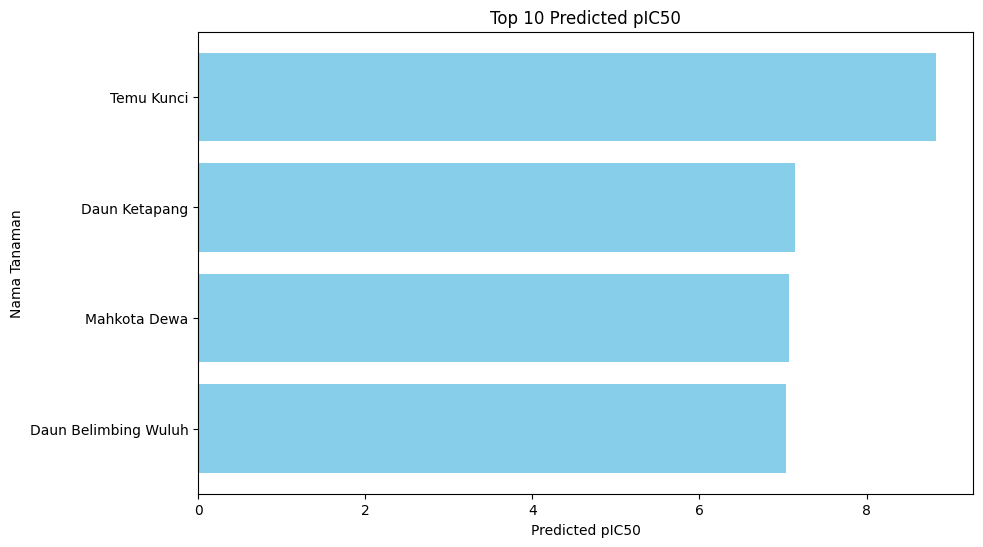

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Visualisasi Prediksi pIC50
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["Nama Tanaman"].head(10), df_sorted["predicted_pIC50"].head(10), color='skyblue')
plt.xlabel("Predicted pIC50")
plt.ylabel("Nama Tanaman")
plt.title("Top 10 Predicted pIC50")
plt.gca().invert_yaxis()
plt.show()

Visualisasi 2D Molekul dengan Predicted pIC50 Tertinggi:


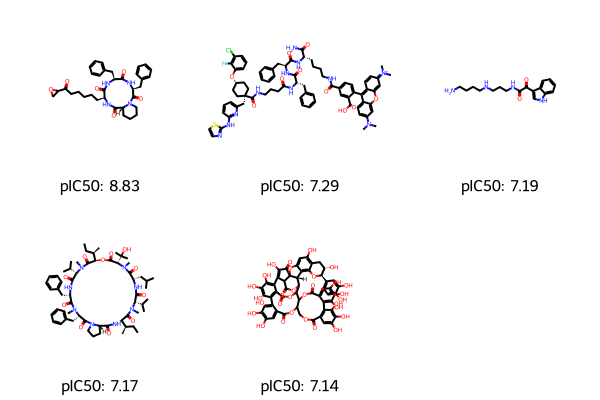

Visualisasi 2D Molekul dengan Tanimoto Similarity Tertinggi:


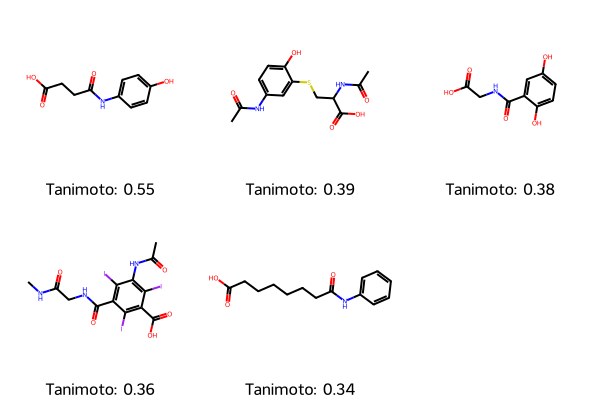

In [49]:
from rdkit.Chem import Draw
from IPython.display import display

# Ambil 5 besar molekul berdasarkan predicted pIC50
top_5_pIC50 = df_sorted.head(5)

# Ambil 5 besar molekul berdasarkan Tanimoto Similarity
top_5_similarity = top_candidates.head(5)

# Gambar molekul dengan predicted pIC50 tertinggi
print("Visualisasi 2D Molekul dengan Predicted pIC50 Tertinggi:")
images_pIC50 = [Chem.MolFromSmiles(row["SMILES"]) for _, row in top_5_pIC50.iterrows()]
legends_pIC50 = [f"pIC50: {row['predicted_pIC50']:.2f}" for _, row in top_5_pIC50.iterrows()]
img_pIC50 = Draw.MolsToGridImage(images_pIC50, legends=legends_pIC50, molsPerRow=3)
display(img_pIC50)

# Gambar molekul dengan Tanimoto Similarity tertinggi
print("Visualisasi 2D Molekul dengan Tanimoto Similarity Tertinggi:")
images_similarity = [Chem.MolFromSmiles(row["SMILES"]) for _, row in top_5_similarity.iterrows()]
legends_similarity = [f"Tanimoto: {row['tanimoto_similarity']:.2f}" for _, row in top_5_similarity.iterrows()]
img_similarity = Draw.MolsToGridImage(images_similarity, legends=legends_similarity, molsPerRow=3)
display(img_similarity)


In [43]:
!pip install py3Dmol

In [54]:
from rdkit.Chem import AllChem
import py3Dmol

# Fungsi untuk menampilkan dan menyimpan visualisasi 3D dengan label
def visualize_and_save_3d(smiles, title="Molecule", filename="molecule_3d.html"):
    mol = Chem.MolFromSmiles(smiles)
    mol_with_h = Chem.AddHs(mol)  # Tambahkan atom hidrogen
    AllChem.EmbedMolecule(mol_with_h, AllChem.ETKDG())  # Optimasi konformasi 3D
    AllChem.MMFFOptimizeMolecule(mol_with_h)  # Optimasi energi menggunakan MMFF

    mol_block = Chem.MolToMolBlock(mol_with_h)
    view = py3Dmol.view(width=400, height=400)
    view.addModel(mol_block, "mol")
    view.setStyle({"stick": {}})
    view.zoomTo()

    # Tambahkan label di atas molekul
    view.addLabel(title, {
        'position': {'x': 0, 'y': 0, 'z': 2},
        'backgroundColor': 'white',
        'fontSize': 14,
        'borderRadius': 4,
        'fontColor': 'black'
    })

    # Simpan visualisasi ke file HTML
    with open(filename, "w") as f:
        f.write(view._make_html())
    print(f"3D visualisasi disimpan sebagai '{filename}'")
    return view

# Visualisasi dan penyimpanan 5 molekul dengan predicted pIC50 tertinggi
print("Visualisasi dan Penyimpanan Molekul dengan Predicted pIC50 Tertinggi:")
for idx, row in top_5_pIC50.iterrows():
    filename = f"pIC50_top_{idx+1}_3D.html"
    view = visualize_and_save_3d(row["SMILES"], f"pIC50: {row['predicted_pIC50']:.2f}", filename)
    view.show()

# Visualisasi dan penyimpanan 5 molekul dengan Tanimoto Similarity tertinggi
print("Visualisasi dan Penyimpanan Molekul dengan Tanimoto Similarity Tertinggi:")
for idx, row in top_5_similarity.iterrows():
    filename = f"Tanimoto_top_{idx+1}_3D.html"
    view = visualize_and_save_3d(row["SMILES"], f"Tanimoto: {row['tanimoto_similarity']:.2f}", filename)
    view.show()


Visualisasi dan Penyimpanan Molekul dengan Predicted pIC50 Tertinggi:
3D visualisasi disimpan sebagai 'pIC50_top_577_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualisasi disimpan sebagai 'pIC50_top_538_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualisasi disimpan sebagai 'pIC50_top_426_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualisasi disimpan sebagai 'pIC50_top_619_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualisasi disimpan sebagai 'pIC50_top_1191_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Visualisasi dan Penyimpanan Molekul dengan Tanimoto Similarity Tertinggi:
3D visualisasi disimpan sebagai 'Tanimoto_top_491_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualisasi disimpan sebagai 'Tanimoto_top_2193_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualisasi disimpan sebagai 'Tanimoto_top_2189_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualisasi disimpan sebagai 'Tanimoto_top_2123_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualisasi disimpan sebagai 'Tanimoto_top_2204_3D.html'


3Dmol.js failed to load for some reason. Please check your browser console for error messages.